# STEREO data with poor quality


This example shows STEREO/EUVI images with poor quality.

Here we use [Matplotlib](https://matplotlib.org), [Astropy](https://www.astropy.org), and [SunPy](https://sunpy.org) modules.

In [1]:
import matplotlib.pyplot as plt

import astropy.units as u
import astropy.time as T

from sunpy.net import Fido, attrs
from sunpy.sun import constants
import sunpy.map

In [2]:
def EUVI_get(SC, wavelength, in_time):

    in_time = T.Time(in_time)
    st_time = in_time - T.TimeDelta(1*u.hour)
    en_time = in_time + T.TimeDelta(1*u.hour)
    
    TimeRange = attrs.Time(st_time, en_time, in_time)
    WaveLength = attrs.Wavelength(int(wavelength)*u.angstrom)
    
    if SC == 'STEREO-A':
        SourceName     = attrs.Source('STEREO_A')
        InstrumentName = attrs.Instrument('SECCHI')
        
    elif SC == 'STEREO-B':
        SourceName     = attrs.Source('STEREO_B')
        InstrumentName = attrs.Instrument('SECCHI')  
        
    else:
        raise ValueError()
    
    
    EUV_call = Fido.search(TimeRange, SourceName, 
                            InstrumentName, WaveLength)
    
    Downloaded_file = Fido.fetch(EUV_call, progress =False)      
    Downloaded_Map = sunpy.map.Map(Downloaded_file)
    
    Downloaded_Map.meta['rsun_ref'] = constants.radius.to_value(u.m)
    
    
    return Downloaded_Map


# Example 1.

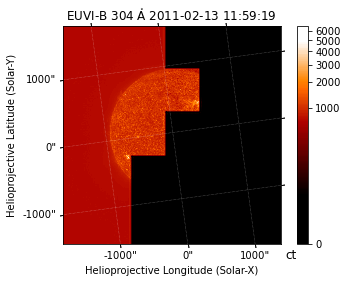

In [3]:
Poor_Ex01 = EUVI_get('STEREO-B', 304, '2011-02-13T12:00:00')

Poor_Ex01.peek()


# Example 2.

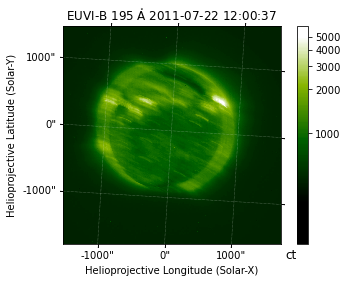

In [4]:
Poor_Ex02 = EUVI_get('STEREO-B', 195, '2011-07-22T12:00:00')

Poor_Ex02.peek()


# Example 3.

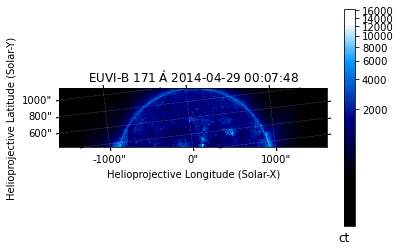

In [5]:
Poor_Ex03 = EUVI_get('STEREO-B', 171, '2014-04-29T00:00:00')

Poor_Ex03.peek()


# Example 4.

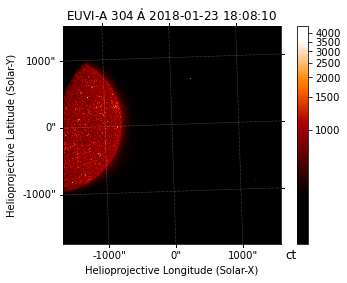

In [6]:
Poor_Ex04 = EUVI_get('STEREO-A', 304, '2018-01-23T18:00:00')

Poor_Ex04.peek()


# Example 5.

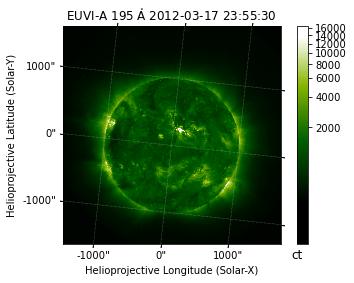

In [7]:
Poor_Ex05 = EUVI_get('STEREO-A', 195, '2012-03-18T00:00:00')

Poor_Ex05.peek()